<a href="https://colab.research.google.com/github/sm160388/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Data Collection**

In [62]:
# importing important libraries
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import seaborn as sns                       #visualisation
import plotly.express as px
import folium
sns.set(color_codes=True)                   #default colours are used

Mount the data


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

#Let us read our data first

In [65]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [66]:
data.shape

(119390, 32)

In [67]:
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

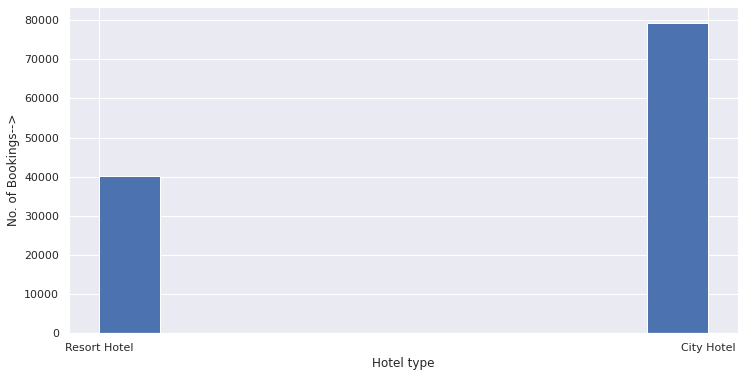

In [68]:
fig, ax= plt.subplots(figsize=(12,6))
ax.hist(data['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('No. of Bookings-->')
plt.show()

In [69]:
#To rename the column names
data.rename(columns={'hotel':'Hotel','is_canceled':'Cancelled','lead_time':'Lead time','arrival_date_year':'Arrival date year','arrival_date_month':'Arrival date month','arrival_date_week_number':'Arrival date week number','arrival_date_day_of_month':'Arrival date day of month','stays_in_weekend_nights':'Stays in weekend nights','stays_in_week_nights':'Stays in week nights','adults':'Adults','children':'Children','babies':'Babies','meal':'Meal','country':'Country','market_segment':'Market segment','distribution_channel':'Distribution channel','is_repeated_guest':'Repeated guest','previous_cancellation':'Previous cancellation','previous_bookings_not_cancelled':'Previous bookings not cancelled','reserved_room_type':'Reserved room type','assigned_room_type':'Assigned room type','booking_changes':'Booking changes','deposit_typ':'Deposit type','agent':'Agent','company':'Company','days_in_waiting_list':'Days in waiting list','customer_type':'Customer type','adr':'Average daily rate','required_car_parking_spaces':'Required car parking spaces','total_of_special_requests':'Total of special requests','reservation_status':'Reservation status','reservation_status_date':'Reservation status date'},inplace=True)

In [70]:
data

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date week number,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,...,deposit_type,Agent,Company,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status,Reservation status date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [71]:
data.dtypes

Hotel                              object
Cancelled                           int64
Lead time                           int64
Arrival date year                   int64
Arrival date month                 object
Arrival date week number            int64
Arrival date day of month           int64
Stays in weekend nights             int64
Stays in week nights                int64
Adults                              int64
Children                          float64
Babies                              int64
Meal                               object
Country                            object
Market segment                     object
Distribution channel               object
Repeated guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
Reserved room type                 object
Assigned room type                 object
Booking changes                     int64
deposit_type                       object
Agent                             

**Data Cleaning and** **Preparation**

In [72]:
data=data.drop(columns=['Arrival date week number','Company','Agent','Reservation status date'])
data.shape
data.head(5)

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,...,Reserved room type,Assigned room type,Booking changes,deposit_type,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [74]:
#rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows:",duplicate_rows_data.shape)

Number of duplicate rows: (32267, 28)


In [75]:
data.count()

Hotel                             119390
Cancelled                         119390
Lead time                         119390
Arrival date year                 119390
Arrival date month                119390
Arrival date day of month         119390
Stays in weekend nights           119390
Stays in week nights              119390
Adults                            119390
Children                          119386
Babies                            119390
Meal                              119390
Country                           118902
Market segment                    119390
Distribution channel              119390
Repeated guest                    119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
Reserved room type                119390
Assigned room type                119390
Booking changes                   119390
deposit_type                      119390
Days in waiting list              119390
Customer type                     119390
Average daily ra

In [77]:
#dropping the duplicates
data=data.drop_duplicates()
data.head(5)

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,...,Reserved room type,Assigned room type,Booking changes,deposit_type,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [79]:
data.count()

Hotel                             87123
Cancelled                         87123
Lead time                         87123
Arrival date year                 87123
Arrival date month                87123
Arrival date day of month         87123
Stays in weekend nights           87123
Stays in week nights              87123
Adults                            87123
Children                          87119
Babies                            87123
Meal                              87123
Country                           86672
Market segment                    87123
Distribution channel              87123
Repeated guest                    87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
Reserved room type                87123
Assigned room type                87123
Booking changes                   87123
deposit_type                      87123
Days in waiting list              87123
Customer type                     87123
Average daily rate                87123


In [80]:
#finding the null values
print(data.isnull().sum())

Hotel                               0
Cancelled                           0
Lead time                           0
Arrival date year                   0
Arrival date month                  0
Arrival date day of month           0
Stays in weekend nights             0
Stays in week nights                0
Adults                              0
Children                            4
Babies                              0
Meal                                0
Country                           451
Market segment                      0
Distribution channel                0
Repeated guest                      0
previous_cancellations              0
previous_bookings_not_canceled      0
Reserved room type                  0
Assigned room type                  0
Booking changes                     0
deposit_type                        0
Days in waiting list                0
Customer type                       0
Average daily rate                  0
Required car parking spaces         0
Total of spe

In [81]:
#dropping the missing values
data=data.dropna()  #will drop the not available values
data.count()

Hotel                             86668
Cancelled                         86668
Lead time                         86668
Arrival date year                 86668
Arrival date month                86668
Arrival date day of month         86668
Stays in weekend nights           86668
Stays in week nights              86668
Adults                            86668
Children                          86668
Babies                            86668
Meal                              86668
Country                           86668
Market segment                    86668
Distribution channel              86668
Repeated guest                    86668
previous_cancellations            86668
previous_bookings_not_canceled    86668
Reserved room type                86668
Assigned room type                86668
Booking changes                   86668
deposit_type                      86668
Days in waiting list              86668
Customer type                     86668
Average daily rate                86668


In [82]:
#after dropping the values
print(data.isnull().sum())

Hotel                             0
Cancelled                         0
Lead time                         0
Arrival date year                 0
Arrival date month                0
Arrival date day of month         0
Stays in weekend nights           0
Stays in week nights              0
Adults                            0
Children                          0
Babies                            0
Meal                              0
Country                           0
Market segment                    0
Distribution channel              0
Repeated guest                    0
previous_cancellations            0
previous_bookings_not_canceled    0
Reserved room type                0
Assigned room type                0
Booking changes                   0
deposit_type                      0
Days in waiting list              0
Customer type                     0
Average daily rate                0
Required car parking spaces       0
Total of special requests         0
Reservation status          

In [83]:
data.describe()

,Cancelled,Lead time,Arrival date year,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,Babies,Repeated guest,previous_cancellations,previous_bookings_not_canceled,Booking changes,Days in waiting list,Average daily rate,Required car parking spaces,Total of special requests
count,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000
mean,0.273884,80.033623,2016.212062,15.817741,1.007592,2.628883,1.878583,0.139452,0.010846,0.039346,0.030057,0.177263,0.272523,0.735727,106.604624,0.083710,0.700801
std,0.445953,85.990822,0.685885,8.834580,1.028408,2.041877,0.626190,0.457155,0.113670,0.194417,0.369813,1.720550,0.728841,9.891722,54.987661,0.280802,0.832121
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.550000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


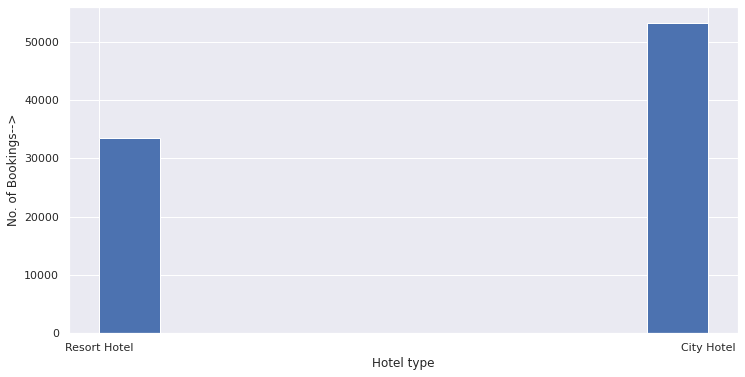

In [85]:
fig, ax= plt.subplots(figsize=(12,6))
ax.hist(data['Hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('No. of Bookings-->')
plt.show()

<Figure size 1440x1080 with 0 Axes>

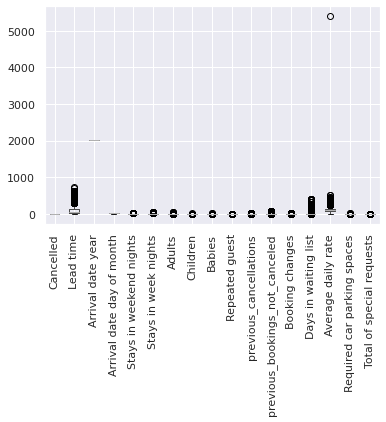

<Figure size 1440x1080 with 0 Axes>

In [86]:
data.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

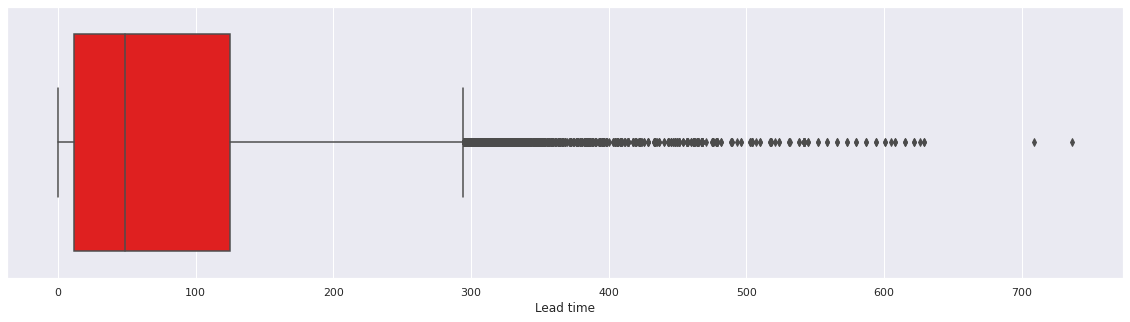

In [87]:
#plotting boxplot to find outliers
#plot for lead_time variable
plt.figure(figsize=(20,5))
sns.boxplot(x=data['Lead time'],color='Red')

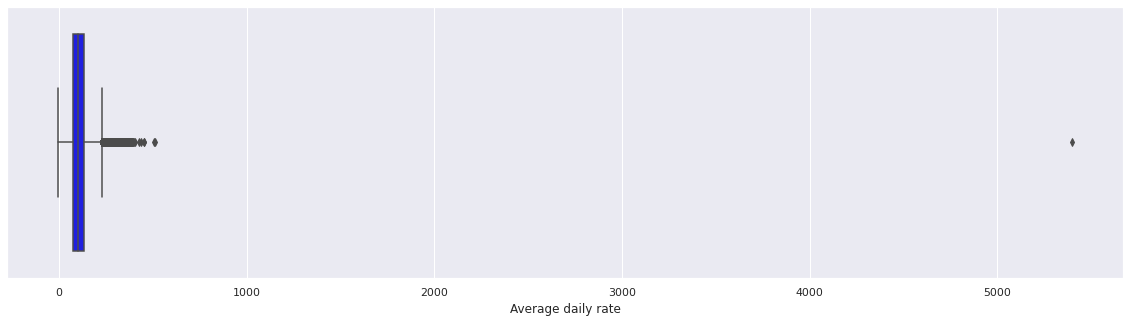

In [88]:
#plotting boxplot to find outliers
#plot for Average daily rate variable
plt.figure(figsize=(20,5))
sns.boxplot(x=data['Average daily rate'],color='Blue')

In [90]:
#Dropping outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR =  q3 - q1
print("\nInternalQuartileRange=\n",IQR)
data1 = data[~((data < (q1 - 1.5 * IQR)) |(data > (q3 + 1.5 * IQR))).any(axis=1)]
data1.head(5)
data1.shape


InternalQuartileRange=
 Cancelled                           1.00
Lead time                         113.00
Arrival date year                   1.00
Arrival date day of month          15.00
Stays in weekend nights             2.00
Stays in week nights                3.00
Adults                              0.00
Children                            0.00
Babies                              0.00
Repeated guest                      0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
Booking changes                     0.00
Days in waiting list                0.00
Average daily rate                 61.85
Required car parking spaces         0.00
Total of special requests           1.00
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(39525, 28)

In [92]:
data.dtypes

Hotel                              object
Cancelled                           int64
Lead time                           int64
Arrival date year                   int64
Arrival date month                 object
Arrival date day of month           int64
Stays in weekend nights             int64
Stays in week nights                int64
Adults                              int64
Children                          float64
Babies                              int64
Meal                               object
Country                            object
Market segment                     object
Distribution channel               object
Repeated guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
Reserved room type                 object
Assigned room type                 object
Booking changes                     int64
deposit_type                       object
Days in waiting list                int64
Customer type                     

In [94]:
#Changing dtype to its correct dtype
data['Children']=data['Children'].astype(int)


**Data** **Visualisation**

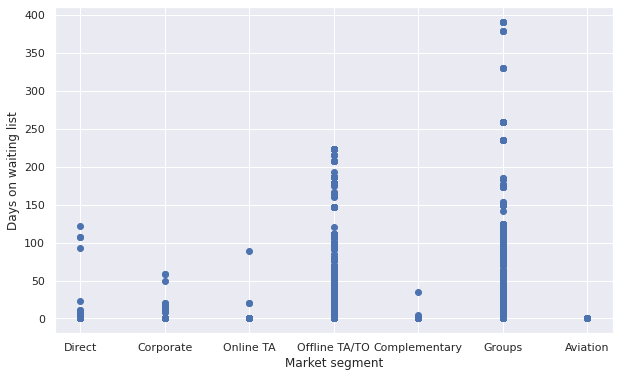

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['Market segment'], data['Days in waiting list'])
ax.set_xlabel('Market segment')
ax.set_ylabel('Days on waiting list')
plt.show()

<function matplotlib.pyplot.show>

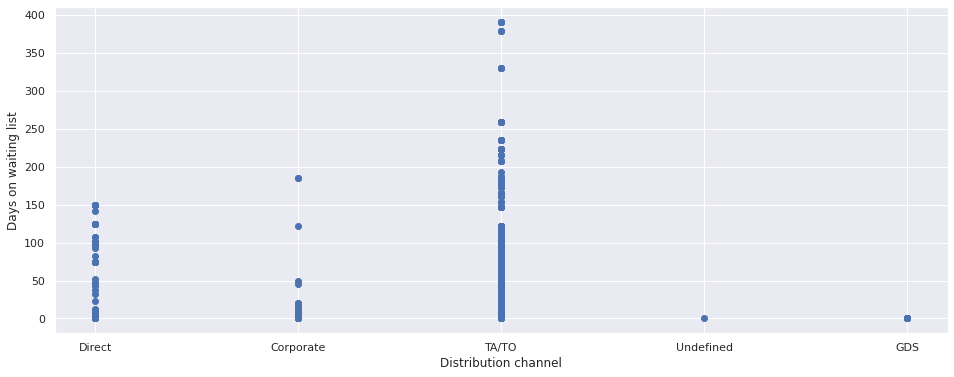

In [96]:
fig,ax = plt.subplots(figsize=(16,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['Distribution channel'], data['Days in waiting list'])
ax.set_xlabel('Distribution channel')
ax.set_ylabel('Days on waiting list')
plt.show

In [97]:
grp=data.groupby('Arrival date month')
p=grp['Lead time'].agg(np.mean)
q=grp['Stays in week nights'].agg(np.mean)
r=grp['Stays in weekend nights'].agg(np.mean)
s=grp['Booking changes'].agg(np.sum)
t=grp['Days in waiting list'].agg(np.sum)
u=grp['Average daily rate'].agg(np.mean)
v=grp['Hotel'].agg(np.sum)
print(p)
print(q)
print(r)
print(s)
print(t)
print(u)
print(v)

Arrival date month
April         76.024487
August       102.652779
December      59.271076
February      35.342014
January       34.692840
July         112.083300
June         103.931057
March         53.619188
May           91.950397
November      47.780142
October       83.195453
September     93.909448
Name: Lead time, dtype: float64
Arrival date month
April        2.446117
August       3.014453
December     2.426654
February     2.292752
January      2.343284
July         2.997600
June         2.813090
March        2.538699
May          2.515049
November     2.484904
October      2.360297
September    2.710534
Name: Stays in week nights, dtype: float64
Arrival date month
April        1.004081
August       1.145062
December     0.899704
February     0.927019
January      0.848583
July         1.208100
June         1.044496
March        0.866702
May          0.964002
November     0.854914
October      0.966769
September    1.069122
Name: Stays in weekend nights, dtype: float64
Arriva

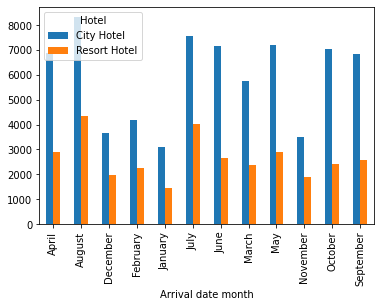

In [ ]:
data1=data.groupby(['Arrival date month','Hotel']).size()
data1=data1.unstack()
data1.plot(kind='bar')

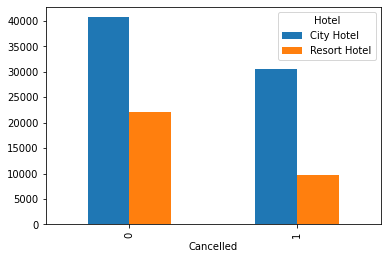

In [ ]:
data2=data.groupby(['Cancelled','Hotel']).size()
data2=data2.unstack()
data2.plot(kind='bar')

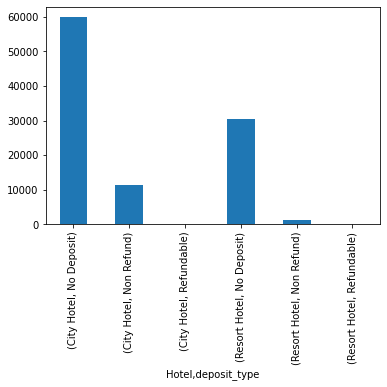

In [ ]:
data3=data.groupby(['Hotel','deposit_type']).size()
#data3=data3.unstack()
data3.plot(kind='bar')

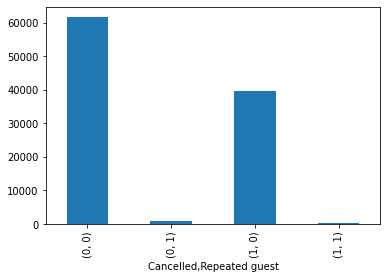

In [ ]:
data4=data.groupby(['Cancelled','Repeated guest']).size()
#data4=data4.unstack()
data4.plot(kind='bar')

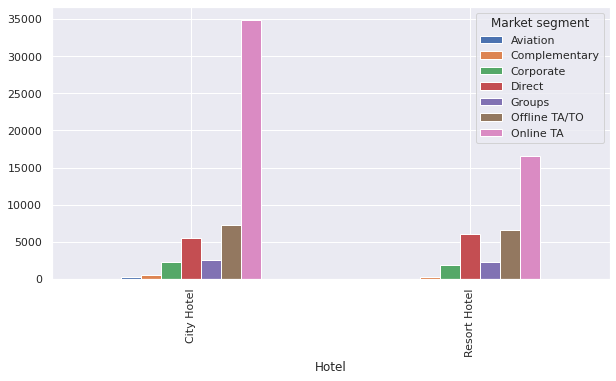

In [100]:
#fig, ax = plt.subplots(figsize=(16,6))
data5=data.groupby(['Hotel','Market segment']).size()
data5=data5.unstack()
data5=data5.plot(kind='bar', figsize=(10,5))

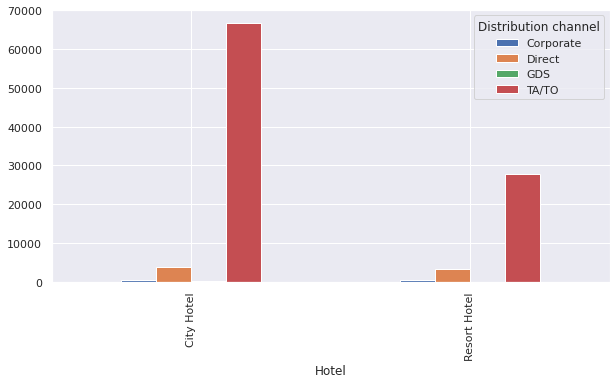

In [ ]:
data6=data.groupby(['Hotel','Distribution channel']).size()
data6=data6.unstack()
data6.plot(kind='bar',figsize=(10,5))

In [102]:
datashort= pd.DataFrame(data,columns=['Total of special requests','babies','children','adults'])
corrMatrix = datashort.corr()
print(corrMatrix)

                           Total of special requests  babies  children  adults
Total of special requests                        1.0     NaN       NaN     NaN
babies                                           NaN     NaN       NaN     NaN
children                                         NaN     NaN       NaN     NaN
adults                                           NaN     NaN       NaN     NaN


In [105]:
corrMatrix.fillna(value=0)

,Total of special requests,babies,children,adults
Total of special requests,1.0,0.0,0.0,0.0
babies,0.0,0.0,0.0,0.0
children,0.0,0.0,0.0,0.0
adults,0.0,0.0,0.0,0.0


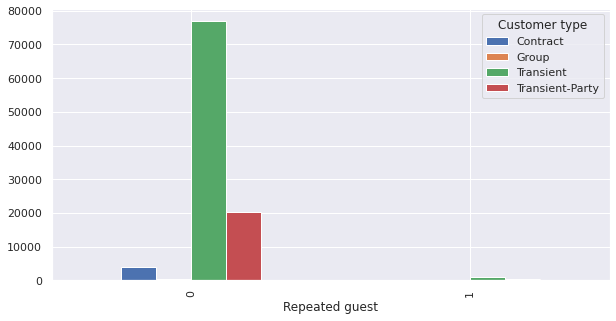

In [ ]:
data7=data.groupby(['Repeated guest','Customer type']).size()
data7=data7.unstack()
data7.plot(kind='bar',figsize=(10,5))

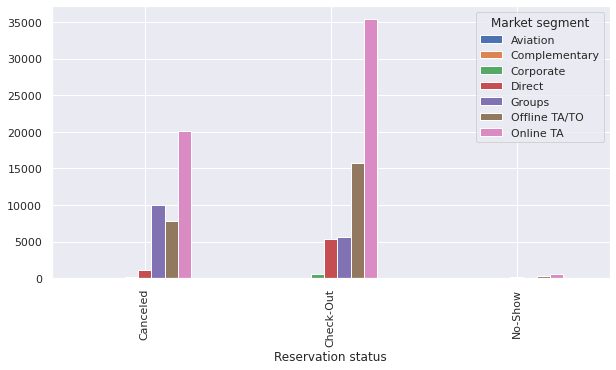

In [ ]:
data8=data.groupby(['Reservation status','Market segment']).size()
data8=data8.unstack()
data8.plot(kind='bar',figsize=(10,5))

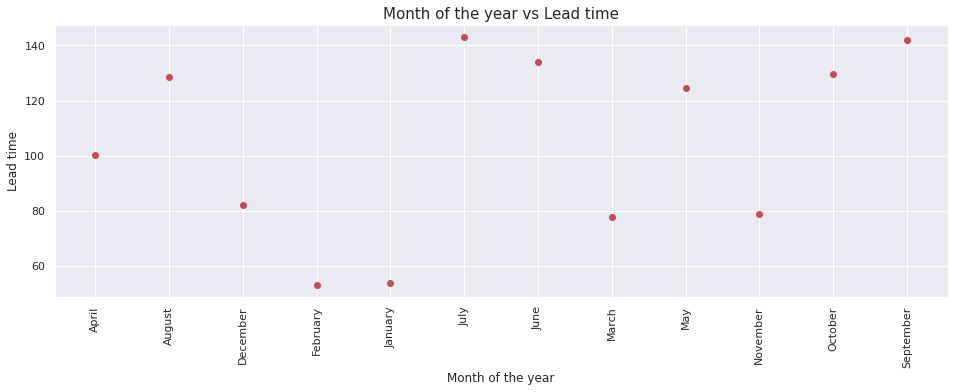

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(p,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Lead time',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Lead time')
plt.show()

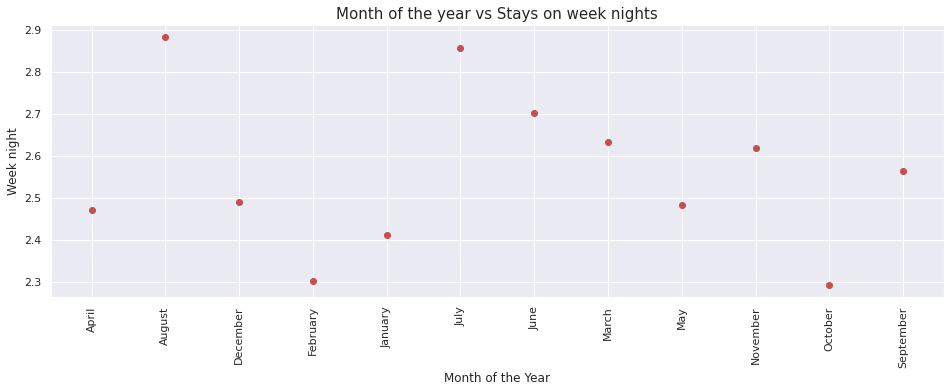

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(q,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Stays on week nights',fontsize=15)
plt.xlabel('Month of the Year')
plt.ylabel('Week night')
plt.show()

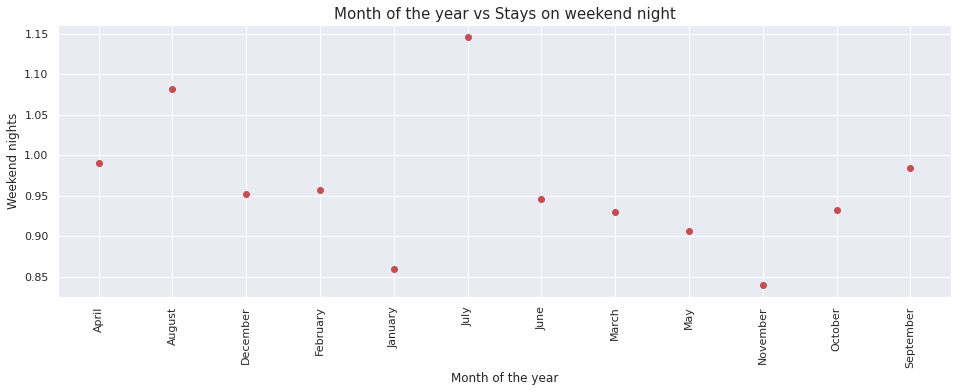

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(r,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Stays on weekend night',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Weekend nights')
plt.show()

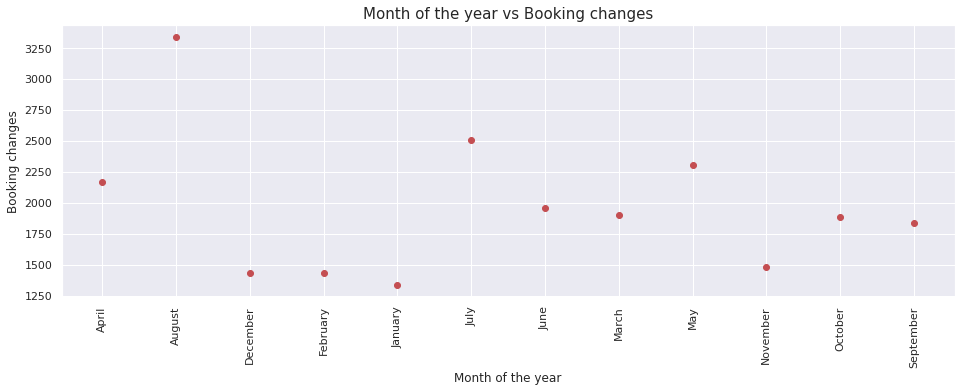

In [106]:
plt.figure(figsize=(16,5))
plt.plot(s,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Booking changes',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Booking changes')
plt.show()

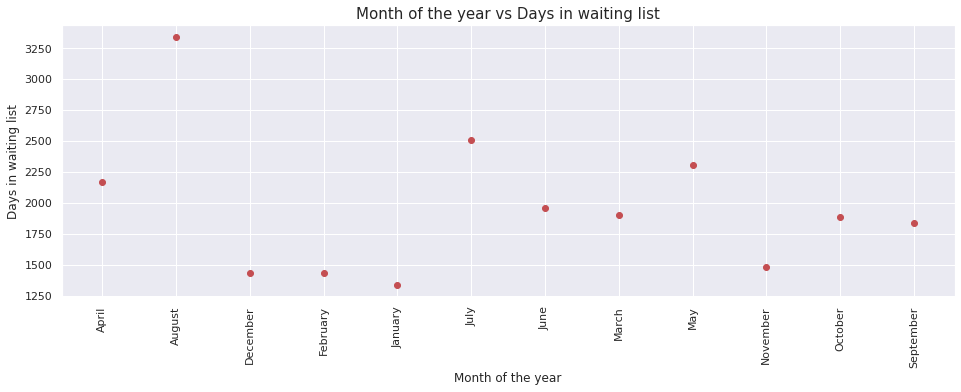

In [107]:
plt.figure(figsize=(16,5))
plt.plot(s,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Days in waiting list',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Days in waiting list')
plt.show()

,Cancelled,Lead time,Arrival date year,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,Babies,Repeated guest,previous_cancellations,previous_bookings_not_canceled,Booking changes,Days in waiting list,Average daily rate,Required car parking spaces,Total of special requests
Cancelled,1.000000,0.181671,0.088735,0.005123,0.059999,0.083229,0.080534,0.068020,-0.020589,-0.089691,0.050411,-0.050282,-0.093111,0.001423,0.127965,-0.183089,-0.119956
Lead time,0.181671,1.000000,0.139448,0.009624,0.234674,0.311213,0.137391,0.028356,-0.003705,-0.148085,0.004835,-0.076426,0.077450,0.130113,0.020443,-0.085454,0.034090
Arrival date year,0.088735,0.139448,1.000000,-0.010403,0.004866,0.003483,0.037196,0.040773,-0.023137,0.024044,-0.052969,0.028209,0.008570,-0.027787,0.176080,-0.038792,0.064026
Arrival date day of month,0.005123,0.009624,-0.010403,1.000000,-0.016884,-0.027513,-0.001618,0.015930,-0.000778,-0.004343,-0.008625,0.000665,0.006519,0.005384,0.021910,0.008704,-0.001716
Stays in weekend nights,0.059999,0.234674,0.004866,-0.016884,1.000000,0.550722,0.086360,0.027812,0.013608,-0.108257,-0.020927,-0.054265,0.049025,-0.031604,0.036282,-0.042796,0.030255
Stays in week nights,0.083229,0.311213,0.003483,-0.027513,0.550722,1.000000,0.094508,0.030474,0.016000,-0.114911,-0.019012,-0.057077,0.084204,0.002005,0.051431,-0.044123,0.035405
Adults,0.080534,0.137391,0.037196,-0.001618,0.086360,0.094508,1.000000,0.022388,0.016232,-0.173440,-0.042238,-0.117888,-0.049204,-0.016514,0.245169,0.009245,0.110842
Children,0.068020,0.028356,0.040773,0.015930,0.027812,0.030474,0.022388,1.000000,0.017523,-0.046026,-0.018992,-0.028553,0.030831,-0.020306,0.325980,0.037057,0.044288
Babies,-0.020589,-0.003705,-0.023137,-0.000778,0.013608,0.016000,0.016232,0.017523,1.000000,-0.013045,-0.005285,-0.008887,0.080894,-0.006799,0.022759,0.030478,0.094570
Repeated guest,-0.089691,-0.148085,0.024044,-0.004343,-0.108257,-0.114911,-0.173440,-0.046026,-0.013045,1.000000,0.207105,0.447235,0.005920,-0.012737,-0.154771,0.072610,-0.001621


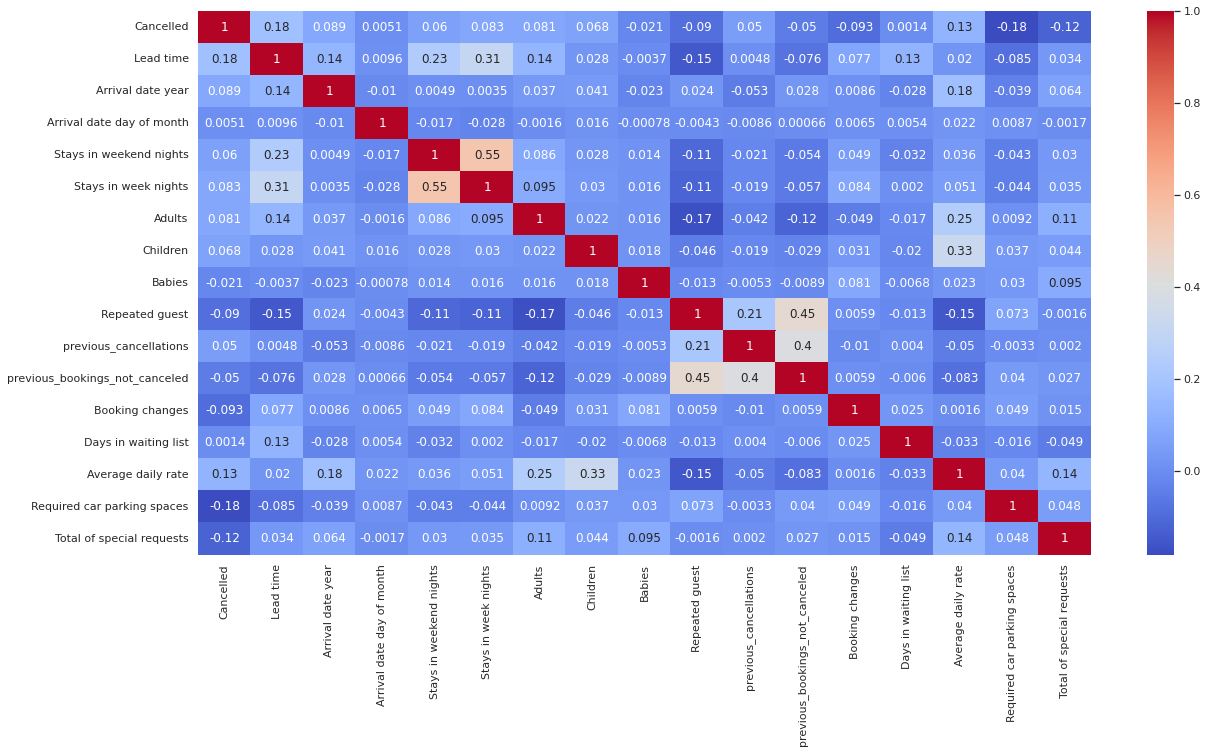

In [108]:
#heatmap 
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="coolwarm",annot=True) #BrBG, RdGy, coolwarm
c

**Data** **Modeling**

In [109]:
data.shape

(86668, 28)

In [110]:
total_cancellations = data["Cancelled"].sum()
print(total_cancellations)
resort_hotel_cancelations = data.loc[data["Hotel"] == "Resort Hotel"]["Cancelled"].sum()
print(resort_hotel_cancelations)
city_hotel_cancelations = data.loc[data["Hotel"] == "City Hotel"]["Cancelled"].sum()
print(city_hotel_cancelations)

23737
7862
15875


In [111]:
#as percent:
rel_cancel = total_cancellations / data.shape[0] * 100
rh_rel_cancel = resort_hotel_cancelations / data.loc[data["Hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_hotel_cancelations / data.loc[data["Hotel"] == "City Hotel"].shape[0] * 100

print(f"Total booking canceled: {total_cancellations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_hotel_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel booking canceled: {city_hotel_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total booking canceled: 23,737 (27 %)
Resort hotel bookings canceled: 7,862 (24 %)
City hotel booking canceled: 15,875 (30 %)


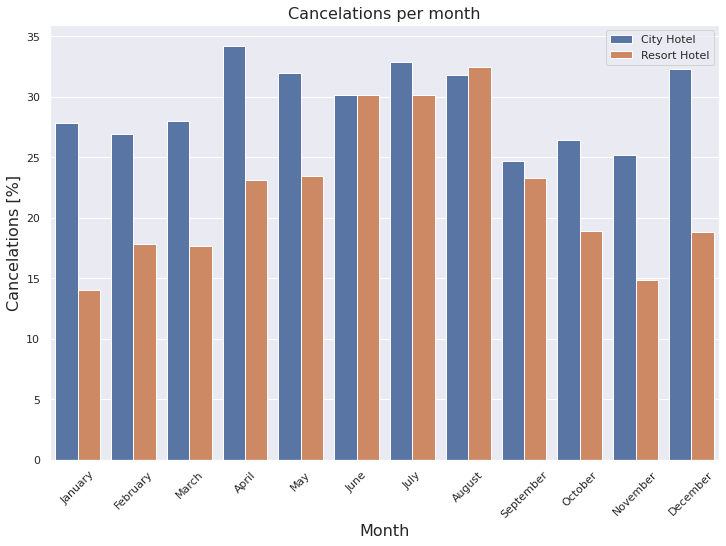

In [113]:
#Create a DataFrame with the relevant data:
res_book_per_month = data.loc[(data["Hotel"] == "Resort Hotel")].groupby("Arrival date month")["Hotel"].count()
res_cancel_per_month = data.loc[(data["Hotel"] == "Resort Hotel")].groupby("Arrival date month")["Cancelled"].sum()

city_book_per_month = data.loc[(data["Hotel"] == "City Hotel")].groupby("Arrival date month")["Hotel"].count()
city_cancel_per_month = data.loc[(data["Hotel"] == "City Hotel")].groupby("Arrival date month")["Cancelled"].sum()

res_cancel_data= pd.DataFrame({"Hotel": "Resort Hotel","Month": list(res_book_per_month.index),
                               "Bookings": list(res_book_per_month.values),
                               "Cancelations": list(res_cancel_per_month.values)})
city_cancel_data= pd.DataFrame({"Hotel": "City Hotel",
                               "Month": list(city_book_per_month.index),
                               "Bookings": list(city_book_per_month.values),
                               "Cancelations": list(city_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, city_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

#order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories= ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y= "cancel_percent", hue= "Hotel",
            hue_order= ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()
  

In [114]:
cancel_corr = data.corr()["Cancelled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

Required car parking spaces       0.183089
Lead time                         0.181671
Average daily rate                0.127965
Total of special requests         0.119956
Booking changes                   0.093111
Repeated guest                    0.089691
Arrival date year                 0.088735
Stays in week nights              0.083229
Adults                            0.080534
Children                          0.068020
Stays in weekend nights           0.059999
previous_cancellations            0.050411
previous_bookings_not_canceled    0.050282
Babies                            0.020589
Arrival date day of month         0.005123
Days in waiting list              0.001423
Name: Cancelled, dtype: float64

We see that Lead time,Required car parking spaces,Average daily rate, the Total of special requests and Booking changes are the most important factors for cancellation of booking.

In [115]:
data.groupby("Cancelled")["Reservation status"].value_counts()

Cancelled  Reservation status
0          Check-Out             62931
1          Canceled              22727
           No-Show                1010
Name: Reservation status, dtype: int64

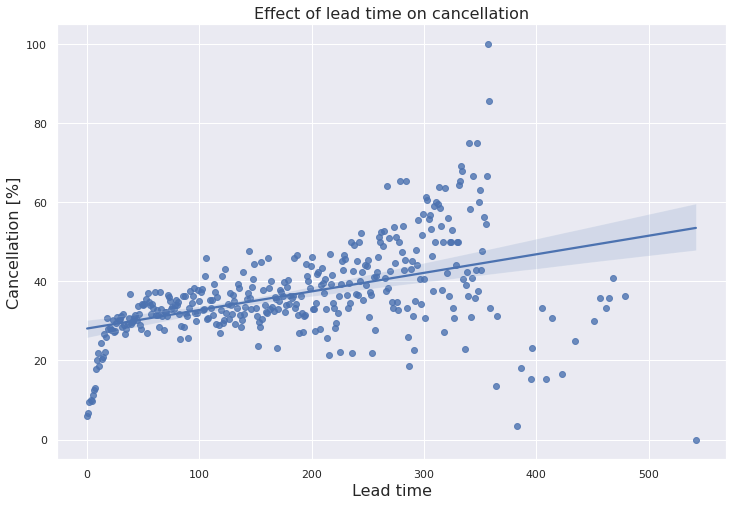

In [116]:
lead_cancel_data = data.groupby("Lead time")["Cancelled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >=10]
plt.figure(figsize=(12,8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values *100)
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancellation [%]", fontsize=16)
#plt.xlin(0,365)
plt.show()